In [1]:
# Mounting drive
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


# mask RCNN

In [2]:
# !pip install tensorflow==1.13.1
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)

TensorFlow 1.x selected.
1.15.2


In [3]:
# !git clone https://github.com/matterport/Mask_RCNN.git
import os
os.chdir('/content/gdrive/My Drive/Mask_RCNN/samples/coco')
!ls

coco.py		    inspect_model.ipynb    __pycache__
inspect_data.ipynb  inspect_weights.ipynb


In [4]:
import os
import glob
import sys
import random
import math
import re
import time
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.axes as ax
import json
import skimage.io
from skimage import measure
from scipy.io import loadmat
from scipy.spatial import distance
import cv2
from PIL import Image

# Root directory of the project
ROOT_DIR = os.path.abspath("../../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log
from mrcnn.utils import Dataset

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

# Path to Shapes trained weights
SHAPES_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_shapes.h5")

Using TensorFlow backend.


In [0]:
import coco
config = coco.CocoConfig()
COCO_DIR = "/content/coco" 

# Override the training configurations with a few
# changes for inferencing.
class InferenceConfig(config.__class__):
    # Run detection on one image at a time
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
# config.display()


# Device to load the neural network on.
# Useful if you're training a model on the same 
# machine, in which case use CPU and leave the
# GPU for training.
DEVICE = "/cpu:0"  # /cpu:0 or /gpu:0

# Inspect the model in training or inference modes
# values: 'inference' or 'training'
# TODO: code for 'training' test mode not ready yet
TEST_MODE = "inference"

In [0]:
def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

In [7]:
# Create model in inference mode
with tf.device(DEVICE):
    model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR,
                              config=config)

# Set weights file path
if config.NAME == "shapes":
    weights_path = SHAPES_MODEL_PATH
elif config.NAME == "coco":
    weights_path = COCO_MODEL_PATH
# Or, uncomment to load the last model you trained
# weights_path = model.find_last()

# Load weights
print("Loading weights ", weights_path)
model.load_weights(weights_path, by_name=True)

class_names =  ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.
Loading weights  /content/gdrive/My Drive/Mask_RCNN/mask_rcnn_coco.h5


# Deep Gaze II

In [8]:
import os
os.chdir('/content/gdrive/My Drive')
!ls

'1st figure in the video.fig'
'291 Bionic Vision Project'
'a1 (1).m'
 a1.m
'Cog Neuro Final_Sudhanshu Srivastava.gdoc'
'Colab Notebooks'
'Cont Cuing.gdoc'
'Contextual Cueing IO.gdoc'
'contrast_ttest (1).m'
 contrast_ttest.m
 CS291
'CS291I-C1-Introduction (1).pptx'
 CS291I-C2-Sight-Recovery-Technologies.pptx
 deepgaze
'diff_minus_slope (1).m'
 diff_minus_slope.m
'DNNs learn to attend.gslides'
'draw_box (1).m'
 draw_box.m
'draw_slope (1).m'
'draw_slope2 (1).m'
 draw_slope2.m
'draw_slope_func (1).m'
 draw_slope_func.m
 draw_slope.m
 Experiments:.gdoc
'first level results.fig'
'fMRI analysis Quiz 3 keywords.gdoc'
'generate_images (1).m'
 generate_images.m
'gen_images (1).m'
 gen_images.m
 gen_test_images.m
'Getting started.pdf'
'HW 3_Sudhanshu.gdoc'
'HW 4.gdoc'
 HW6_Sudhanshu.gdoc
 imagecreate.m
'ImageNet Trained CNNs are biased towards texture.gslides'
 imdiltest.m
 IMG_0753.mov
 IMG_20190327_154437531_HDR.jpg
 IMG_20190327_154446885_HDR.jpg
 IMG_20190327_154454194.jpg
 IMG_20190327_16023

In [0]:
# !git clone https://github.com/mpatacchiola/deepgaze.git

In [9]:
os.chdir("/content/gdrive/My Drive/deepgaze")
!ls

debug.log  deepgaze  doc  etc  examples  LICENSE  README.md  setup.py


In [0]:
#!/usr/bin/env python

# The MIT License (MIT)
# Copyright (c) 2017 Massimiliano Patacchiola
# https://mpatacchiola.github.io
# https://mpatacchiola.github.io/blog/
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF
# MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY
# CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE
# SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

# In this example the FASA algorithm is used in order to process some images.
# The original image and the saliency version are showed for comparison.

import numpy as np
import cv2
from timeit import default_timer as timer
from deepgaze.saliency_map import FasaSaliencyMapping 
import os
import glob
import sys
import random
import math
import re
import time
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.axes as ax
import json
import skimage.io
from scipy.io import loadmat
import cv2
from PIL import Image

# def main():

#     image_1 = cv2.imread("./horse.jpg")
#     image_2 = cv2.imread("./car.jpg")
#     image_3 = cv2.imread("./plane.jpg")
#     image_4 = cv2.imread("./pear.jpg")

#     # for each image the same operations are repeated
#     my_map = FasaSaliencyMapping(image_1.shape[0], image_1.shape[1])  # init the saliency object
#     start = timer()
#     image_salient_1 = my_map.returnMask(image_1, tot_bins=8, format='BGR2LAB')  # get the mask from the original image
#     image_salient_1 = cv2.GaussianBlur(image_salient_1, (3,3), 1)  # applying gaussin blur to make it pretty
#     end = timer()
#     print("--- %s Image 1 tot seconds ---" % (end - start))

#     my_map = FasaSaliencyMapping(image_2.shape[0], image_2.shape[1])
#     start = timer()
#     image_salient_2 = my_map.returnMask(image_2, tot_bins=8, format='BGR2LAB')
#     image_salient_2 = cv2.GaussianBlur(image_salient_2, (3,3), 1)
#     end = timer()
#     print("--- %s Image 2 tot seconds ---" % (end - start))

#     my_map = FasaSaliencyMapping(image_3.shape[0], image_3.shape[1])
#     start = timer()
#     image_salient_3 = my_map.returnMask(image_3, tot_bins=8, format='BGR2LAB')
#     #image_salient_3 = cv2.GaussianBlur(image_salient_3, (3,3), 1)
#     end = timer()
#     print("--- %s Image 3 tot seconds ---" % (end - start))

#     my_map = FasaSaliencyMapping(image_4.shape[0], image_4.shape[1])
#     start = timer()
#     image_salient_4 = my_map.returnMask(image_4, tot_bins=8, format='BGR2LAB')
#     image_salient_4 = cv2.GaussianBlur(image_salient_4, (3,3), 1)
#     end = timer()
#     print("--- %s Image 4 tot seconds ---" % (end - start))

#     # Creating stack of images and showing them on screen
#     original_images_stack = np.hstack((image_1, image_2, image_3, image_4))
#     saliency_images_stack = np.hstack((image_salient_1, image_salient_2, image_salient_3, image_salient_4))
#     saliency_images_stack = np.dstack((saliency_images_stack,saliency_images_stack,saliency_images_stack))
#     cv2.imshow("Original-Saliency", np.vstack((original_images_stack, saliency_images_stack)))

#     while True:
#         if cv2.waitKey(33) == ord('q'):
#             cv2.destroyAllWindows()
#             break


# if __name__ == "__main__":
#     main()

# Segmentation * (Saliency + Optical flow)


In [0]:
from skimage import feature
from sklearn.preprocessing import normalize
import glob

### functions

In [0]:
def sal_mask(image):
  '''
  PARAMETERS:
    image: input image [h, w, 3]
  
  RETURN:
    origs: original images [h, w, 3, #images]
    origs_gray: original images in grayscale [h, w, #images]
    saliens: deepgaze saliency map of images [h, w, #images]
    masks: combined object masks of images [h, w, #images]
  '''
  h,w,_ = image.shape

  # get masks
  results = model.detect([image])
  r = results[0]
  obj_masks = r["masks"]
  # fig = visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
  #                           class_names, r['scores'])

  # get mask edges
  num_objs = r["masks"].shape[2]
  obj_edges = np.zeros(r["masks"].shape)
  for o in range(num_objs):
    m = r["masks"][:,:,o]
    edges = feature.canny(m, sigma=5).astype("uint8")
    kernel = np.ones((10,10), np.uint8) 
    edges_dilated = cv2.dilate(edges,kernel)
    obj_edges[:,:,o] = edges_dilated

  # # get all object masks into one mask
  # combined_masks = np.sum(r['masks'],2)

  # get saliency map
  my_map = FasaSaliencyMapping(h, w) 
  image_salient = my_map.returnMask(image, tot_bins=8, format='BGR2LAB')  # get the mask from the original image
  image_salient_blr = cv2.GaussianBlur(image_salient, (3,3), 1)

  return image_salient_blr, obj_masks, obj_edges


def intersec_area(a, b):  # returns 0 if rectangles don't intersect
    dx = np.min([a[3], b[3]]) - np.max([a[1], b[1]])
    dy = np.mean([a[2], b[2]]) - np.max([a[0], b[0]])
    if (dx>=0) and (dy>=0):
        return dx*dy
    else: 
      return 0

### read original video and set up

In [0]:
vid_path = "/content/gdrive/My Drive/291 Bionic Vision Project/Asa_Video/stim18_vid" # ORIGINAL VIDEO PATH FOLDER 
vid_name = 'stim18.mp4'

cap = cv2.VideoCapture('%s/%s'% (vid_path, vid_name))
ret, frame1 = cap.read()

results = model.detect([frame1])
rs = results[0]
# fig = visualize.display_instances(frame1, rs['rois'], rs['masks'], rs['class_ids'], 
                          # class_names, rs['scores'])


# set up optical flow 
prvs = cv2.cvtColor(frame1,cv2.COLOR_BGR2GRAY)
hsv = np.zeros_like(frame1)
hsv[...,1] = 255

# saliency observation window
W = 5
w_counter = 1
s, m, e = sal_mask(frame1)
s_history = np.copy(s)
s_history = np.expand_dims(s_history, axis=2)

### Segmentation (enhanced by optical flow) + Saliency (smoothied from previous frames and filted out large variance)


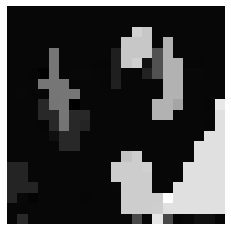

In [26]:
### create processed frames and downsampled frames ###
k=1
while(1):
    ret, frame2 = cap.read()
    if ret == True:
      next = cv2.cvtColor(frame2,cv2.COLOR_BGR2GRAY)

      # get saliency (h,w) and masks, edges (h,w,#objects), saliency histories
      s, m, e = sal_mask(frame1)
      s2, m2, e2 = sal_mask(frame2)
      s_history = np.concatenate([s_history, np.expand_dims(s2, axis=2)], axis = 2)

      if s_history.shape[2] < W: # if not observed 5 frames yet
        s_orig = np.copy(s)
      else: # if observed 5 frames
        recent_saliens = s_history[:,:,-W:]
        recent_saliens_var = np.var(recent_saliens, axis = 2) #calculate recent saliency variance
        recent_saliens_var = normalize(recent_saliens_var)
        recent_saliens_var[recent_saliens_var>5e-05] = 0
        s_orig = np.mean(recent_saliens, axis = 2) #take mean of saliency maps
        np.putmask(s_orig, recent_saliens_var==0, 0)
        
      e_combined = np.sum(e, axis = 2)
      m_combined = np.sum(m, axis = 2)
      num_objs = m.shape[2]

      # optical flow
      flow = cv2.calcOpticalFlowFarneback(prvs,next, None, 0.5, 3, 15, 3, 5, 1.2, 0)
      mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])
      hsv[...,0] = ang*180/np.pi
      hsv[...,2] = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)
      
      if num_objs > 0:
        # compute optical flow and saliency for each object within the mask
        o_opt = []
        o_s = []
        for o in range(num_objs):
          o_m = m[:,:,o]
          o_mag = np.mean(hsv[:,:,2] * o_m)
          o_opt.append(o_mag)
          o_s.append((s*o_m).mean())

        o_opt_n = normalize(np.array(o_opt).reshape(1,-1))
        o_s_n = normalize(np.array(o_s).reshape(1,-1))

        #highlight mask of e with high optical flow magnitude
        #highlight saliency of object mask 
        for o in range(num_objs):
          o_e = e[:,:,o]
          o_m = m[:,:,o]
          np.putmask(m_combined, o_m, 255 * o_opt_n[0][o])

      out = np.maximum(s_orig, m_combined)
      # out /= out.max()/1.0 
      out_d = cv2.resize(out.astype('float64'), (21,21), interpolation=cv2.INTER_LANCZOS4)

      plt.imshow(out,'gray')
      plt.axis('off')
      plt.savefig("%s/frame_%d.jpg" % (vid_path,k), bbox_inches='tight', pad_inches=0)

      plt.imshow(out_d, "gray")
      plt.axis("off")
      plt.savefig("%s/frame_%d_d.jpg" % (vid_path,k), bbox_inches='tight', pad_inches=0)

      k += 1
      prv = next
      frame1 = frame2

    else:
      break

cv2.destroyAllWindows()
cap.release()

In [0]:
cv2.destroyAllWindows()
cap.release()

## create final video

In [0]:
import cv2
import numpy as np
import glob
from os.path import isfile, join
pathIn = vid_path
pathOut = '%s/clip.avi' % pathIn
frame_array = []
files = glob.glob('%s/*d.jpg'%pathIn) # read final downsampled frames
fps = 28

img = cv2.imread(files[0])
height, width, layers = img.shape
size = (width,height)

out = cv2.VideoWriter(pathOut,cv2.VideoWriter_fourcc(*'DIVX'), fps, size)
for i in range(len(files)):
    filename= files[i]
    img = cv2.imread(filename)
    out.write(img)

out.release()